# 6.1 종속성과 독립성

사건 A가 B에 영향을 미치면 종속 사건
사건 A가 B에 영향을 미치지않으면 독립 사건

# 6.2 조건부 확률

In [1]:
P(E,F)=P(E)P(F)
P(E|F)=P(E,F)/P(F) 조건부 확률 (사건 F가 발생했을 때 E가 발생할 확률)
P(E,F)=P(E|F)P(F)
만약, E,F가 독립이라면
P(E|F)=P(E)

SyntaxError: invalid syntax (Temp/ipykernel_5756/2229496114.py, line 1)

In [9]:
import enum,random

In [8]:
class Kid(enum.Enum):
    BOY=0
    GIRL=1
def random_kid()->Kid:
    return random.choice([Kid.BOY,Kid.GIRL])

both_girls=0
older_girl=0
either_girl=0

random.seed(0)

for _ in range(10000):
    younger=random_kid()
    older=random_kid()
    if older==Kid.GIRL:
        older_girl+=1
    if older==Kid.GIRL and younger==Kid.GIRL:
        both_girls+=1
    if older==Kid.GIRL or younger==Kid.GIRL:
        either_girl+=1
        
print("P(both | older):",both_girls/older_girl)
print("P(both | either):",both_girls/either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


# 6.3 베이즈 정리

In [ ]:
조건부 확률을 반대로 뒤집는 것
P(E|F)=P(F|E)P(E)/P(F)
P(E|F)=P(F|E)P(E)/[P(F|E)P(E)+P(F|~E)P(~E)]

# 6.4 확률변수

In [10]:
특정 확률분포와 연관되어 있는 변수

range(0, 10)


# 6.5 연속분포

In [1]:
def uniform_pdf(x: float)-> float: # 균등 분포
    return 1 if 0 <= x <1 else 0

def uniform_cdf(x: float)->float: # 누적 분포
    if x<0: return 0
    elif x<1: return x
    else: return 1
    

# 6.6 정규분포

In [2]:
import math
SQRT_TWO_PI=math.sqrt(2*math.pi)

def normal_pdf(x: float, mu: float=0, sigma:float=1)-> float: # 정규분포
    return (math.exp(-(x-mu)**2/2/sigma**2)/SQRT_TWO_PI*sigma)

c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


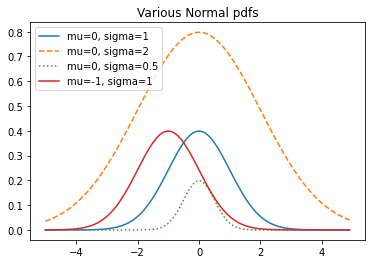

In [3]:
import matplotlib.pyplot as plt
# 정규분포 그래프
xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [4]:
def normal_cdf(x:float, mu:float=0,sigma:float=1)->float: # 정규분포의 누적분포
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

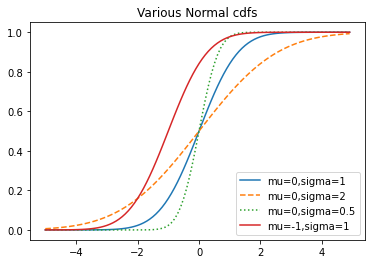

In [5]:
#정규분포의 누적분포 그래프
xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-',label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [6]:
# 가끔씩 특정 확률을 갖는 확률변수의 값을 찾기 위해, normal_cdf의 역함수
def inverse_normal_cdf(p:float,mu:float=0,sigma:float=1,tolerance:float=0.00001)->float:
    if mu !=0 or sigma !=1:
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
    
    low_z=-10.0
    hi_z=10.0
    while hi_z-low_z > tolerance:
        mid_z=(low_z+hi_z)/2
        mid_p=normal_cdf(mid_z)
        
        if mid_p<p:
            low_z=mid_z
        else:
            hi_z=mid_z
    return mid_z


# 6.7 중심극한정리

In [7]:
def bernoulli_trial(p:float)->float: # 베르누이
    return 1 if random.random() <p else 0

def binomial(n:int,p:float)->int: # 이항분포
    return sum(bernoulli_trial(p) for _ in range(n))


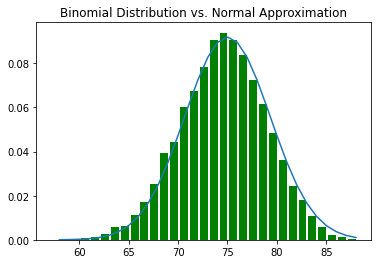

In [10]:
from collections import Counter

def binomial_histogram(p:float,n:int,num_points:int)->None:
    data=[binomial(n,p) for _ in range(num_points)]
    histogram=Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()],[v/num_points for v in histogram.values()], 0.8, color='green') # 이항분포
    mu=p*n
    sigma=math.sqrt(n*p*(1-p))
    
    xs=range(min(data),max(data)+1)
    ys=[normal_cdf(i+0.5, mu, sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs] # 정규분포
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
binomial_histogram(0.75,100,10000)